In [24]:
from __future__ import print_function, division

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import selenium
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import time

In [2]:
# initializing the data frame
columns = ['summoner_name', 'rank', 'hours_played', 'champ_pool', 'percent_games_duo', 'avg_kda']
initial_data = pd.DataFrame(columns = columns)

In [3]:
pd.read_html('https://na.op.gg/ranking/ladder/')

[    Unnamed: 0         Summoners        Tier        LP  Level  Win Ratio
 0            6           1 Shady  Challenger  1,226 LP    283  68461153%
 1            7          iKingVex  Challenger  1,223 LP    356  56648854%
 2            8            JuIius  Challenger  1,203 LP    354  61152454%
 3            9        unrequ1ted  Challenger  1,184 LP    248  43735056%
 4           10     Rank 1 GIobal  Challenger  1,162 LP     63  22113562%
 5           11         FLY V1per  Challenger  1,113 LP    248  49141454%
 6           12      TSM Tactical  Challenger  1,110 LP     82  27115863%
 7           13  Pants are Dragon  Challenger  1,091 LP    224  41133055%
 8           14         From Iron  Challenger  1,082 LP     92  35224759%
 9           15          TSM Zven  Challenger  1,080 LP    246  51039456%
 10          16      Adrian Seira  Challenger  1,053 LP    138  48342353%
 11          17          Scoooped  Challenger  1,050 LP    153  45739154%
 12          18            deftIy  Cha

In [26]:
requests.__path__

['/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/requests']

In [3]:
import requests

url = 'https://na.op.gg/summoner/userName=FriedenInGeduld'
response = requests.get(url)
print(response.text)

	<!DOCTYPE html>
	<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
<head>
	<!-- Venatus Market v3 -->
	<script>
		(function(){
			document.write('<div id="vmv3-ad-manager" style="display:none"></div>');
			document
				.getElementById("vmv3-ad-manager")
				.innerHTML = '<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5a8460b346e0fb0001fc3bac" data-content-width="1120"></iframe>';
			var loaderFrame = document.getElementByI

In [4]:
from bs4 import BeautifulSoup

page = response.text
soup = BeautifulSoup(page, 'lxml')

In [33]:
print(soup.prettify())

<!DOCTYPE html>
<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');
  </script>
  <!-- End Google Tag Mana

In [93]:
url2 = 'https://na.op.gg/ranking/ladder/page=1'
response2 = requests.get(url2)
print(response2.text)

	<!DOCTYPE html>
	<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
<head>
	<!-- Google Tag Manager -->
	<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');</script>
	<!-- End Google Tag Manager -->
	

In [94]:
page2 = response2.text
soup2 = BeautifulSoup(page2, 'lxml')
print(soup2.prettify())

<!DOCTYPE html>
<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');
  </script>
  <!-- End Google Tag Mana

In [234]:
# get summoner name
name_list = pd.read_html('https://na.op.gg/ranking/ladder/page=1')
name_list[0]['Summoners'][3]

'Fanatiik'

In [237]:
# get rank
#rank = soup.find(property='og:description').get('content', np.NaN).split('/')[1]
rank = (2000000*name_list[0]['Unnamed: 0'][3])**3
print(rank)

2828872707781689344


In [86]:
# get total # games played
num_wins = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[0][:-1]))
num_losses = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[1][:-1]))
num_games = num_wins + num_losses
print(str(num_games))

535


In [221]:
# get champ pool
champ_pool = 0
champs_list = soup.find(property='og:description').get('content', np.NaN).split(',')
for champ in champs_list:
    print(champ)
    champ_losses = int(str(champ.split()[-5][:-1]))
    champ_wins = int(str(champ.split()[-4][:-1]))
    champ_total_games = champ_losses + champ_wins
    print(champ_total_games)
    if(champ_total_games / num_games >= 0.2):
        champ_pool += 1
print(champ_pool)

FriedenInGeduld / Silver 1 86LP / 64W 43L Win Ratio 60% / Thresh - 24W 13L Win Ratio 65%
37
 Soraka - 14W 3L Win Ratio 82%
17
 Lux - 10W 5L Win Ratio 67%
15
 Jhin - 4W 7L Win Ratio 36%
11
 Ashe - 4W 4L Win Ratio 50%
8
0


In [276]:
# get winrate
int(soup.find("span", {"class": "winratio"}).text[-3:-1])

60

In [306]:
# get avg kda
num_kdas = len(soup.find_all("span", {"class": "KDA"}))
kdas = soup.find_all("span", {"class": "KDA"})
total_kda, avg_kda = 0, 0
for kda in range(0, num_kdas):
    total_kda += float(kdas[kda].text[0:-2])

avg_kda = total_kda/num_kdas
avg_kda
    


2.434285714285714

In [307]:
# get avg cs
#soup.find_all("div", {"class": "ChampionName"})[0].findNextSibling()
num_cs = len(soup.find_all(class_ = 'ChampionMinionKill tip'))
all_cs = soup.find_all(class_ = 'ChampionMinionKill tip')
total_cs, avg_cs = 0, 0
for cs in range(0, num_cs):
    total_cs += float(all_cs[cs].text.strip().split()[1])

avg_cs = total_cs/num_cs
avg_cs
#soup.find_all(class_ = 'ChampionMinionKill tip')

83.91428571428571

In [181]:
# get total hours played
url3 = 'https://wol.gg/stats/br/theoldestgamer/'
response3 = requests.get(url3)
#pd.read_html('https://wol.gg/stats/br/theoldestgamer/')
page3 = response3.text
soup3 = BeautifulSoup(page3, 'lxml')
#print(soup3.prettify())
#time_played

<p>14,946<br/><b>hours</b></p>

In [189]:
str(soup3.find(id='time-hours').find('p')).split('<')[1][2:]

'14,946'

In [44]:
def scrape_data(num_pages, users_per_page):
    '''
    Scrape summoner_name, rank, hours_played, and champ_pool
    from the web.
    ----
    Parameters:
    num_pages: total number of pages to use for name lookups
    users_per_page: how many users to gather per page
    
    Returns:
    DataFrame with columns 'columns'
    '''
    opgg_leaderboard_url = 'https://na.op.gg/ranking/ladder/page='
    opgg_user_url = 'https://na.op.gg/summoner/userName='
    wol_user_url = 'https://wol.gg/stats/na/' # remember to add a '/' after username
    
    # make base dataframe
    df = pd.DataFrame()
    list_of_data = []
    
    current_entry = 0
    
    # pull list of user names
    for page in range(0,num_pages):
        site_name_list = pd.read_html(opgg_leaderboard_url+str(np.random.randint(1,14396)))
        rand_indices = random.sample(range(0, 95), users_per_page)
        for user in rand_indices:
            # add [summoner name, rank] to list
            # rank is calculated as (1,446,288 - rank)^3
            # ((total number of users on leaderboard + 1) - (actual rank))^3 (inflated to reflect true diffs in rank)
            
            # inflated rank calc
            list_of_data.append([site_name_list[0]['Summoners'][user], 
                                 (1446288-int(site_name_list[0]['Unnamed: 0'][user]))**3])
            
            # reg rank calc
            ##list_of_data.append([site_name_list[0]['Summoners'][user], 
            ##                     (1446288-int(site_name_list[0]['Unnamed: 0'][user]))**3])
            # add rank to list
            #list_of_data.append([site_name_list[0]['Unnamed: 0'][user]])
    
    print(list_of_data)
    # add total champ pool to list        
    for datum in list_of_data:
        print('current entry: ' + str(current_entry))
        print('Now getting data for '+datum[0]+'...')
        #time.sleep(13)
        url = 'https://na.op.gg/summoner/userName=' + datum[0].replace(' ', '+')
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, 'lxml')
        
        #datum.append(soup.find(property='og:description').get('content', np.NaN).split('/')[1])
        
        #print(soup.find(property='og:description').get('content', np.NaN).split('/'))
        if(len(soup.find(property='og:description').get('content', np.NaN).split('/')) >= 3):
            num_wins = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[0][:-1]))
            num_losses = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[1][:-1]))
            num_games = num_wins + num_losses
            champ_pool = 0
            champs_list = soup.find(property='og:description').get('content', np.NaN).split(',')
            for champ in champs_list:
                ##print(str(champ.split())+' : ' + str(champ.split()[-5][:-1]))
                if(str(champ.split()[-5][:-1]) == 'Rati' ):
                    champ_losses = 0
                    champ_wins = 0
                else:
                    champ_losses = int(str(champ.split()[-5][:-1]))
                    champ_wins = int(str(champ.split()[-4][:-1]))
                champ_total_games = champ_losses + champ_wins
                if(champ_total_games / num_games >= 0.2):
                    champ_pool += 1
        else:
            champ_pool = 0
        datum.append(champ_pool)
        
        # add winrate to list
        #print('winrate text: ')
        #print(soup.find("span", {"class": "winratio"}).text)
        datum.append(int(soup.find("span", {"class": "winratio"}).text[-3:-1]))
        
        # add avg_kda to list
        #print('kda text: ')
        #print(soup.find_all("span", {"class": "KDA"}))
        num_kdas = len(soup.find_all("span", {"class": "KDA"}))
        if num_kdas > 0:
            kdas = soup.find_all("span", {"class": "KDA"})
            total_kda, avg_kda = 0, 0
            for kda in range(0, num_kdas):
                total_kda += float(kdas[kda].text[0:-2])
            avg_kda = total_kda/num_kdas
        else:
            avg_kda = np.NaN
        datum.append(avg_kda)
        
        # add avg_cs to list
        #print('cs text: ')
        #print(soup.find_all(class_ = 'ChampionMinionKill tip'))
        num_cs = len(soup.find_all(class_ = 'ChampionMinionKill tip'))
        if num_cs > 0:
            all_cs = soup.find_all(class_ = 'ChampionMinionKill tip')
            total_cs, avg_cs = 0, 0
            for cs in range(0, num_cs):
                total_cs += float(all_cs[cs].text.strip().split()[1])

            avg_cs = total_cs/num_cs
        else:
            avg_cs = np.NaN
        datum.append(avg_cs)
        
        # pull hours played from wol, add to list
        url2 = 'https://wol.gg/stats/na/'+datum[0].replace(' ', '')+'/'
        response2 = requests.get(url2)
        page2 = response2.text
        soup2 = BeautifulSoup(page2, 'lxml')
        if(soup2.find(id='time-hours') != None):
            datum.append(int(str(soup2.find(id='time-hours').find('p')).split('<')[1][2:].replace(',', '')))
        else:
            datum.append(np.NaN)
            
        # add more features directly from riot api
        response3, apiDict = get_summ_id(datum[0])
        if response3.status_code == 404:
            avg_dmg_obj = np.NaN
            avg_gold_spent = np.NaN
            avg_cc_score = np.NaN
            avg_dmg_champs = np.NaN
            avg_dmg_taken = np.NaN
            avg_vision_score = np.NaN
            avg_dps = np.NaN
            datum.append(avg_dmg_obj)
            datum.append(avg_gold_spent)
            datum.append(avg_cc_score)
            datum.append(avg_dmg_champs)
            datum.append(avg_dmg_taken)
            datum.append(avg_vision_score)
            datum.append(avg_dps)
            current_entry += 1
        else:
            if response3.status_code == 429:
                print('went 429 getting summ id')
                print(response3.headers)
                print('retry after: '+ str(response3.headers['Retry-After']))
                time.sleep(int(response3.headers['Retry-After'])+1)
                response3, apiDict = get_summ_id(datum[0])
            response3, apiDict2 = get_matchlist(apiDict)
            if response3.status_code == 429:
                print('went 429 getting matchlist')
                print(response3.headers)
                print('retry after: '+ str(response3.headers['Retry-After']))
                time.sleep(int(response3.headers['Retry-After'])+1)
                response3, apiDict2 = get_matchlist(apiDict)
            if response3.status_code == 404:
                print('404 on matchlist')
                avg_dmg_obj = np.NaN
                avg_gold_spent = np.NaN
                avg_cc_score = np.NaN
                avg_dmg_champs = np.NaN
                avg_dmg_taken = np.NaN
                avg_vision_score = np.NaN
                avg_dps = np.NaN
                datum.append(avg_dmg_obj)
                datum.append(avg_gold_spent)
                datum.append(avg_cc_score)
                datum.append(avg_dmg_champs)
                datum.append(avg_dmg_taken)
                datum.append(avg_vision_score)
                datum.append(avg_dps)
                current_entry += 1
            else:
                # using dummy apiDict2 so that same apiDict is not passed if call needs to be rerun
                apiDict = apiDict2
                gameIdList = []
                for match in range(0, 16):
                    gameIdList.append(apiDict['matches'][match]['gameId'])

                dmg_obj, gold_spent, cc_score, total_dmg_champs, total_dmg_taken, vision_score, dps = 0,0,0,0,0,0,0
                for gameId in gameIdList:
                    response3, apiDict = get_match_data(gameId)
                    if response3.status_code == 429:
                        print('went 429 somewhere getting match data')
                        print(response3.headers)
                        print('retry after: '+ str(response3.headers['Retry-After']))
                        time.sleep(int(response3.headers['Retry-After'])+1)
                        response3, apiDict = get_match_data(gameId)
                    if response3.status_code == 404:
                        break
                    #pprint.pprint(apiDict)
                    for participant in apiDict['participantIdentities']:
                        if participant['player']['summonerName'] == datum[0]:
                            partId = participant['participantId']
                    for participant in apiDict['participants']:
                        if participant['participantId'] == partId:
                            dmg_obj += participant['stats']['damageDealtToObjectives']
                            gold_spent += participant['stats']['goldSpent']
                            cc_score += participant['stats']['timeCCingOthers']
                            total_dmg_champs += participant['stats']['totalDamageDealtToChampions']
                            total_dmg_taken += participant['stats']['totalDamageTaken']
                            vision_score += participant['stats']['visionScore']
                            dps += total_dmg_champs/apiDict['gameDuration']
                avg_dmg_obj = dmg_obj/15
                avg_gold_spent = gold_spent/15
                avg_cc_score = cc_score/15
                avg_dmg_champs = total_dmg_champs/15
                avg_dmg_taken = total_dmg_taken/15
                avg_vision_score = vision_score/15
                avg_dps = dps/15
                datum.append(avg_dmg_obj)
                datum.append(avg_gold_spent)
                datum.append(avg_cc_score)
                datum.append(avg_dmg_champs)
                datum.append(avg_dmg_taken)
                datum.append(avg_vision_score)
                datum.append(avg_dps)
                current_entry += 1
            if response3.status_code == 429:
                print('went 429 right at the end')
                print(response3.headers)
                print('retry after: '+ str(response3.headers['Retry-After']))
                time.sleep(int(response3.headers['Retry-After'])+1)
        
    #print(list_of_data)
    
    df = df.append(list_of_data, ignore_index=True)
    df.columns = columns
    return df

In [163]:
#check challenges for how to add data to df bit by bit
test_df = pd.DataFrame()
list_of_data = [[name_list[0]['Summoners'][8], 'Diamond 3 0LP', 2, 3567],
               [name_list[0]['Summoners'][3], 'Diamond 2 40LP', 3, 1123],
               [name_list[0]['Summoners'][23], 'Diamond 4 40LP', 2, 4104]]
test_df = test_df.append(list_of_data, ignore_index=True)
test_df.columns = columns
#test_df = pd.DataFrame(list_of_data, columns=columns)
#test_df = test_df.append(pd.Series([name_list[0]['Summoners'][3]], index=['summoner_name'], ), ignore_index=True)
#test_df['summoner_name'] = test_df.append(pd.Series([name_list[0]['Summoners'][8]], index=['summoner_name']), ignore_index=True)
#test_df['summoner_name'] = test_df.append(pd.Series([name_list[0]['Summoners'][14]], index=['summoner_name']), ignore_index=True)
#test_df['summoner_name'] = test_df.append(pd.Series([name_list[0]['Summoners'][39]], index=['summoner_name']), ignore_index=True)
test_df

,summoner_name,rank,champ_pool,hours_played
0,deftIy,Diamond 3 0LP,2,3567
1,JuIius,Diamond 2 40LP,3,1123
2,insanity,Diamond 4 40LP,2,4104


In [202]:
from datetime import datetime, timedelta

In [39]:
example_data_to_model = scrape_data(1, 30)
example_data_to_model

[['Neuton', 1750644278814518459], ['Patar1o1', 1750674782601283176], ['UrfSushies', 1750822948891576000], ['Sepcross', 1750552769580222392], ['Quomal', 1750836022789126447], ['TheAsianWhoTries', 1750679140314032083], ['BigDaddyBrandon', 1750666067197479424], ['Jay Champloo', 1750862170779480109], ['Tenam', 1750879602917681417], ['ðne', 1750753222537166784], ['VegetaTakaski', 1750818590940188979], ['Clearlust', 1750714002276352875], ['Schumi', 1750770653952212992], ['RedeemedClone', 1750709644505752904], ['theguppyy', 1750875244872283648], ['Big Birdito', 1750844738756984625], ['Reformed Soul', 1750544054581369536], ['Crackërjack', 1750648636476648000], ['WizerGuy', 1750591987433004743], ['m00seinator', 1750857812763008832], ['IbeLazy', 1750883960970310824], ['Pinsent', 1750809875059109593], ['Tyranar', 1750718360054184256], ['SpookyDuky', 1750740149051812521], ['Daulton 666', 1750892677097264576], ['Spoiler', 1750814232996033512], ['Rager On Board', 1750888319030171875], ['TheRealestD'

KeyboardInterrupt: 

In [46]:
#%%timeit
# ran at ~12:57am
data_to_model = scrape_data(75,2)
data_to_model

[['xDARKOx', 288177380394600761], ['18 Dawns', 288261155805701625], ['FEMALExTITAN', 861746900039252928], ['ClairvoyantD', 861907195052684711], ['ßEÁR', 608360242479778368], ['instaGram TheShy', 608407629830317864], ['Vayone', 1144980442101852747], ['PudgyPony', 1144881943794434637], ['Mr Sheep', 145843889672485376], ['Renthemos', 145814799079069821], ['ilijhlijhggrrgd', 832929511596727104], ['PHEN0M', 832868429963497381], ['KSBSlayer', 248731209842037957], ['Raj Kitte', 248765620486033448], ['Cierra', 1540574769666064384], ['destroyer91578', 1540522748321536491], ['Irru', 1693422669693468888], ['Playboy Franco', 1693303331535459944], ['Max Powers', 3715016808124133], ['category g', 3712570682915107], ['Kimchikage', 2339247145472258048], ['hl im tron cat', 2339072693799905519], ['oClawson', 237457243424878784], ['youngchobejr', 237458393816131125], ['Rekoner', 1411112463699177721], ['Flurger', 1411244566067203776], ['Steel Lady', 2094204262184], ['TatorMan73', 2120338369423], ['Ranadii

current entry: 38
Now getting data for BigDaddyGlady...
went 429 somewhere getting match data
{'Content-Type': 'application/json;charset=utf-8', 'Date': 'Fri, 19 Jul 2019  08:31:09 GMT', 'Retry-After': '7', 'X-App-Rate-Limit': '20:1,100:120', 'X-App-Rate-Limit-Count': '11:1,101:120', 'X-Method-Rate-Limit': '500:10', 'X-Method-Rate-Limit-Count': '9:10', 'X-Rate-Limit-Type': 'application', 'X-Riot-Edge-Trace-Id': '6c4dbcd0-c1b2-432b-9845-98199ae8ac9a', 'Content-Length': '62', 'Connection': 'keep-alive'}
retry after: 7
current entry: 39
Now getting data for jNAdothemDISHES...
current entry: 40
Now getting data for Cynthia...
current entry: 41
Now getting data for Blendro...
current entry: 42
Now getting data for VestPlayer...
current entry: 43
Now getting data for FMH JXN...
current entry: 44
Now getting data for HamWithMyEggs...
current entry: 45
Now getting data for SoverignShrub...
current entry: 46
Now getting data for Funny Monkey Man...
went 429 somewhere getting match data
{'Conten

current entry: 133
Now getting data for BabySinger...
current entry: 134
Now getting data for Plumm1034...
current entry: 135
Now getting data for XtremeKami...
current entry: 136
Now getting data for Kha Mikazix...
current entry: 137
Now getting data for Bigandrewgold...
current entry: 138
Now getting data for SHELAT...
current entry: 139
Now getting data for Monkeymon...
current entry: 140
Now getting data for EQ Pyro...
went 429 somewhere getting match data
{'Content-Type': 'application/json;charset=utf-8', 'Date': 'Fri, 19 Jul 2019  09:39:20 GMT', 'Retry-After': '6', 'X-App-Rate-Limit': '20:1,100:120', 'X-App-Rate-Limit-Count': '1:1,101:120', 'X-Method-Rate-Limit': '500:10', 'X-Method-Rate-Limit-Count': '9:10', 'X-Rate-Limit-Type': 'application', 'X-Riot-Edge-Trace-Id': 'fab534f4-8c87-483f-bec1-5dbe06bf2efd', 'Content-Length': '62', 'Connection': 'keep-alive'}
retry after: 6
current entry: 141
Now getting data for MsPlaced...
current entry: 142
Now getting data for M A D G A N K Z.

,summoner_name,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played,avg_dmg_obj,avg_gold_spent,avg_cc_score,avg_dmg_champs,avg_dmg_taken,avg_vision_score,avg_dps
0,xDARKOx,288177380394600761,0,43,2.228571,34.500000,1973,2383.200000,11293.000000,39.666667,20262.266667,26894.066667,15.200000,169.434266
1,18 Dawns,288261155805701625,1,51,4.001429,151.814286,3038,4641.333333,11978.866667,26.200000,22739.000000,26713.666667,4.533333,204.020739
2,FEMALExTITAN,861746900039252928,2,53,2.995714,86.071429,2852,9527.133333,11182.000000,15.533333,19776.466667,17682.200000,23.133333,95.570742
3,ClairvoyantD,861907195052684711,0,47,2.861429,172.414286,937,5509.066667,12337.066667,20.466667,23702.466667,25593.000000,11.333333,127.383470
4,ßEÁR,608360242479778368,0,54,1.578571,151.871429,829,9193.533333,10122.400000,17.000000,15835.666667,27687.400000,13.600000,92.937910
5,instaGram TheShy,608407629830317864,1,53,2.132857,150.142857,1136,4066.733333,8838.800000,26.800000,15508.933333,19663.600000,10.466667,120.419180
6,Vayone,1144980442101852747,2,52,2.318571,117.471429,975,29660.733333,13637.000000,7.133333,17243.866667,31235.333333,20.066667,69.751241
7,PudgyPony,1144881943794434637,1,48,1.567143,154.642857,2529,2620.933333,11718.200000,21.866667,22813.733333,30662.133333,1.133333,182.248586
8,Mr Sheep,145843889672485376,1,32,2.075714,135.085714,1208,7612.666667,9565.533333,20.066667,15877.866667,19991.600000,24.400000,122.097175
9,Renthemos,145814799079069821,2,39,1.950000,28.940000,236,2284.066667,7612.333333,34.666667,12030.666667,14610.866667,20.466667,118.221838


In [7]:
columns = ['summoner_name', 'rank', 'champ_pool', 'winrate', 'avg_kda', 'avg_cs','hours_played', 'avg_dmg_obj', 
           'avg_gold_spent', 'avg_cc_score', 'avg_dmg_champs', 'avg_dmg_taken', 'avg_vision_score', 'avg_dps']

In [249]:
test_data_to_model

,summoner_name,rank,champ_pool,hours_played
0,flytrapgaming,Iron 1 49LP,2,378
1,LiquidHarley,Iron 1 49LP,1,"1,154"
2,Mr Accountant,Iron 1 50LP,2,"1,654"
3,Mkash,Iron 1 50LP,1,"3,943"
4,AzogTheDefier,Iron 1 49LP,0,539
5,saveBOB,Iron 1 49LP,0,"1,805"
6,SugerDaddyLife,Iron 1 50LP,0,188
7,xiiRebirth,Iron 1 49LP,1,303
8,HumanFromHell120,Iron 1 49LP,0,"2,154"
9,sunilyrocks,Iron 1 50LP,1,"1,073"


In [227]:
# drop dupes
data_to_model = data_to_model.drop_duplicates()

In [329]:
data_to_model.corr()

,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
rank,1.000000,0.100024,0.215432,0.167993,0.192481,0.284551
champ_pool,0.100024,1.000000,0.009312,0.076722,-0.056048,-0.039328
winrate,0.215432,0.009312,1.000000,0.278372,0.179768,0.019882
avg_kda,0.167993,0.076722,0.278372,1.000000,-0.029403,-0.055698
avg_cs,0.192481,-0.056048,0.179768,-0.029403,1.000000,-0.020330
hours_played,0.284551,-0.039328,0.019882,-0.055698,-0.020330,1.000000


/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


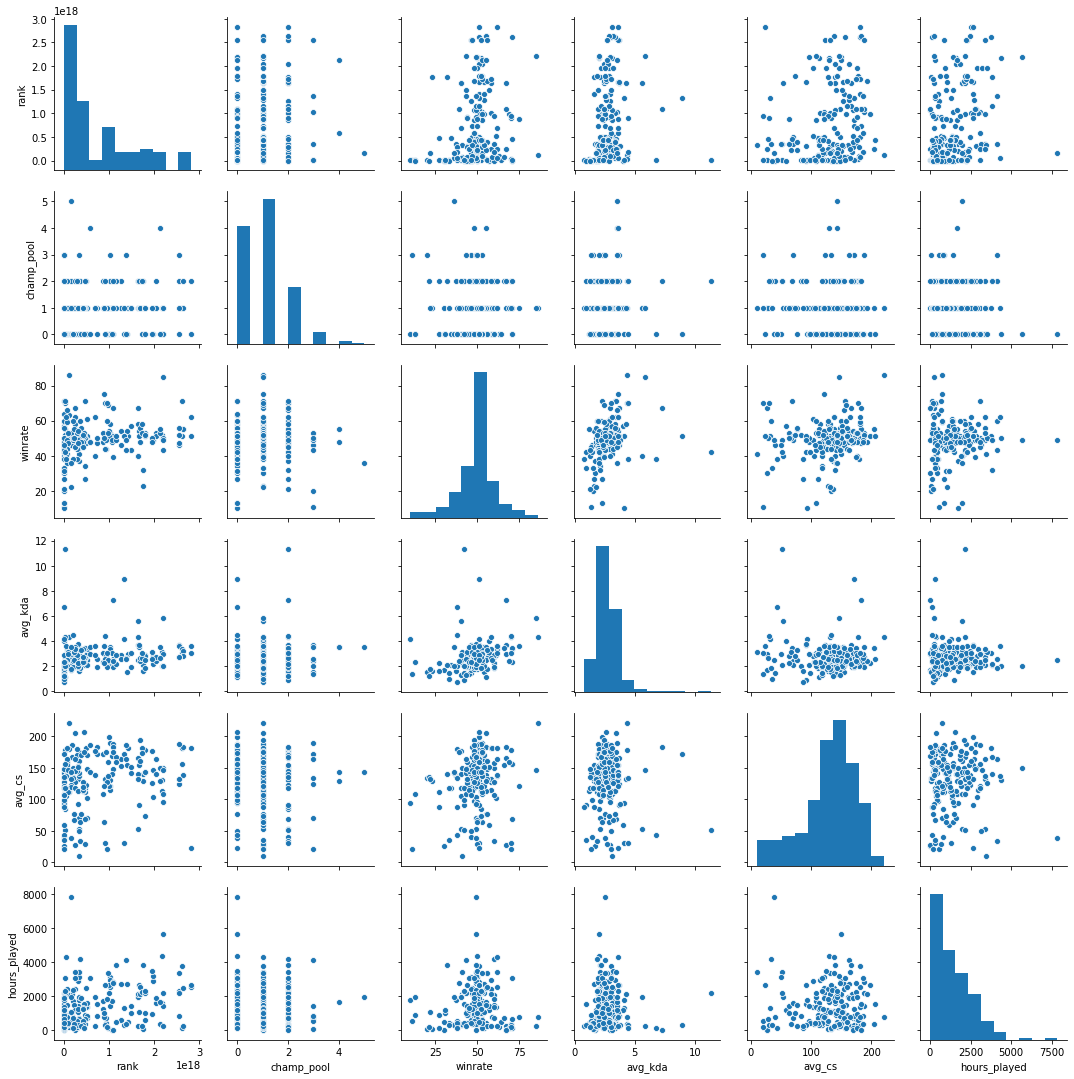

In [330]:
sns.pairplot(data_to_model)

In [333]:
lm = smf.ols('rank ~ champ_pool + winrate + avg_kda + avg_cs + hours_played', data=data_to_model)

fit = lm.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     7.499
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.01e-06
Time:                        21:59:25   Log-Likelihood:                -7998.3
No. Observations:                 188   AIC:                         1.601e+04
Df Residuals:                     182   BIC:                         1.603e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.859e+17   2.99e+17     -2.624      0.009   -1.38e+18   -1.95e+17
champ_pool    7.957e+16   6.15e+16      1.295      0.197   -4.17e+16    2.01e+17
winrate       1.082e+16   5.29e+15      2.044      0.042    3.74e+14    2.13e+16
avg_kda        9.67e+16   4.73e+16      2.043      0.042    3.32e+15     1.9e+17
avg_cs        3.196e+15   1.25e+15      2.547      0.012     7.2e+14    5.67e+15
hours_played   1.83e+14   4.45e+13      4.111      0.000    9.52e+13    2.71e+14
==============================================================================
Omnibus:                       13.204   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.521
Skew:                           0.681   Prob(JB):                     0.000703
Kurtosis:                       2.996   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [332]:
data_to_model.columns

Index(['summoner_name', 'rank', 'champ_pool', 'winrate', 'avg_kda', 'avg_cs',
       'hours_played'],
      dtype='object')

In [327]:
data_to_model.hours_played = data_to_model.hours_played.astype(float, errors='ignore')

In [353]:
data_to_model

,summoner_name,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
0,Disturbedmf,1864536679195674112,0,58,3.567143,69.800000,147.0
1,ClianthuS,1864791192015212544,1,75,3.208571,152.157143,1082.0
2,SHUNP0,715572494840384,2,48,3.034286,148.400000,503.0
3,britishbill,714469030912792,2,54,2.046667,28.266667,308.0
4,Codez95,100093175889946127,0,47,2.101429,113.357143,676.0
5,fatnorth759,100108051458837976,1,42,2.545000,18.700000,457.0
6,djaskdjhas,487742619430654281,1,64,2.904286,178.585714,248.0
7,Du Ma Chu,487631095892591301,0,55,4.670000,127.000000,364.0
8,Schoni,1403137477987509824,2,49,3.081429,32.714286,2375.0
9,qeqweqwee,1403193878772587819,0,49,2.702857,53.757143,1457.0


/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


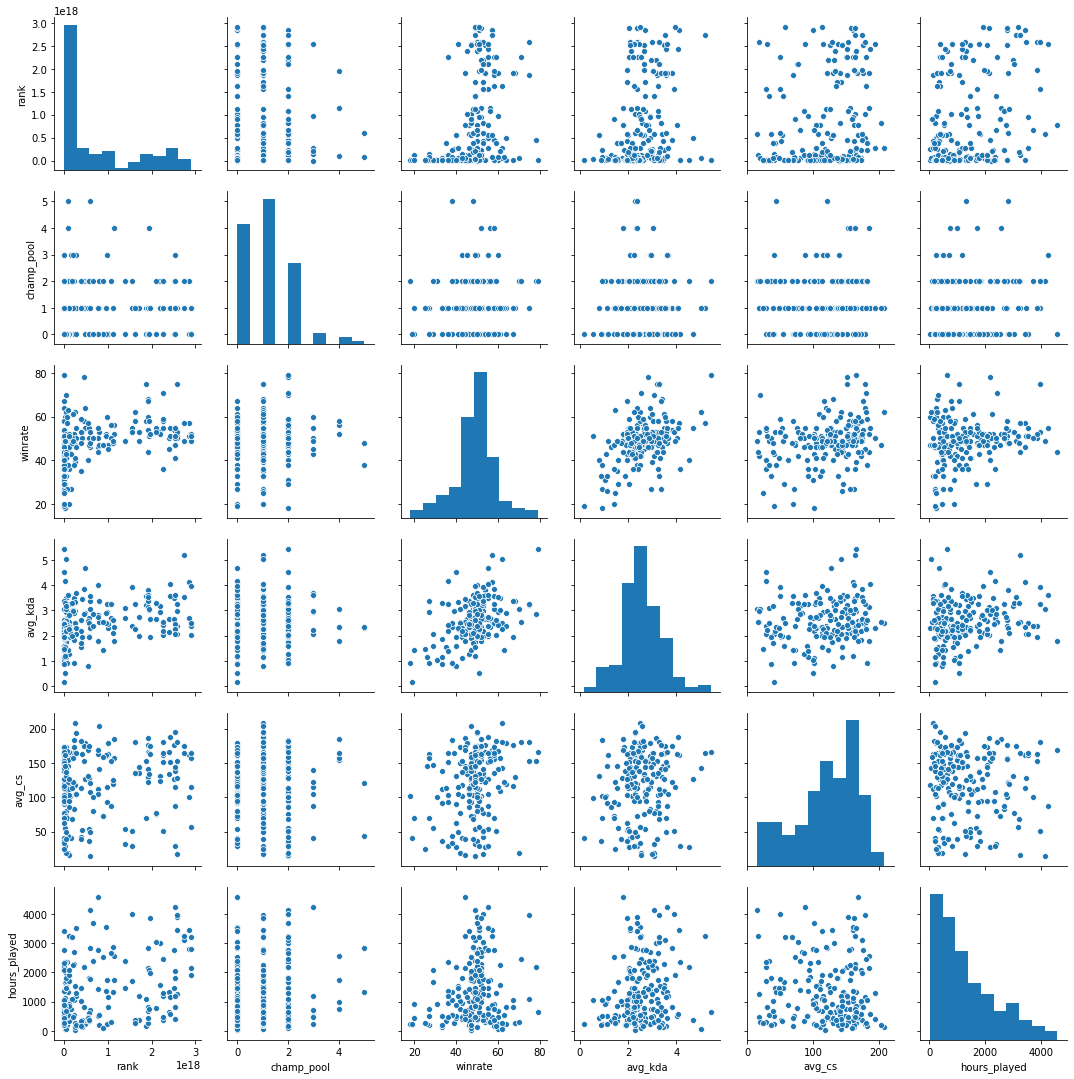

In [355]:
sns.pairplot(data_to_model)

In [392]:
lm1 = smf.ols('rank ~ champ_pool + winrate/hours_played + avg_kda + avg_cs + hours_played', data=data_to_model)

fit1 = lm1.fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     9.254
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           7.14e-09
Time:                        12:36:09   Log-Likelihood:                -8238.2
No. Observations:                 193   AIC:                         1.649e+04
Df Residuals:                     186   BIC:                         1.651e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.391e+17    4.6e+17     -1.390      0.166   -1.55e+18    2.68e+17
champ_pool           -1.285e+16   6.21e+16     -0.207      0.836   -1.35e+17     1.1e+17
winrate               8.051e+15   9.72e+15      0.828      0.409   -1.11e+16    2.72e+16
winrate:hours_played  9.472e+12   6.78e+12      1.398      0.164    -3.9e+12    2.28e+13
avg_kda               1.603e+17   8.36e+16      1.918      0.057   -4.58e+15    3.25e+17
avg_cs                2.581e+15   1.37e+15      1.890      0.060   -1.14e+14    5.28e+15
hours_played          -2.13e+14   3.52e+14     -0.605      0.546   -9.08e+14    4.82e+14
==============================================================================
Omnibus:                       14.992   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.760
Skew:                           0.705   Prob(JB):                     0.000229
Kurtosis:                       2.687   Cond. No.                     6.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [362]:
# test without inflated rank, just reversed rank
test_model_purerank = data_to_model.copy()

In [366]:
test_model_purerank['rank'][0] = 1864536679195674112

/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [371]:
for rank in range(0, len(test_model_purerank['rank'])):
    test_model_purerank['rank'][rank] = test_model_purerank['rank'][rank]**(1/3)
test_model_purerank['rank']

/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0      1230807
1      1230863
2        89443
3        89397
4       464302
5       464325
6       787160
7       787100
8      1119523
9      1119538
10      516550
11      516517
12      639741
13      639721
14      837997
15      838044
16      748759
17      748716
18      253748
19      253730
20     1300693
21     1300736
22     1336949
23     1336909
24     1417101
25     1417093
26      421807
27      421886
28      606307
29      606335
        ...   
170     727203
171     727217
172     361838
173     361830
174     317635
175     317603
176     920134
177     920180
178     579677
179     579656
180    1176605
181    1176647
182    1426504
183    1426506
184    1037578
185    1037554
186      97552
187      97525
188     601239
189     601213
190     354383
191     354321
192     483565
193     483534
194     874106
195     874158
196    1313025
197    1313042
198     173197
199     173222
Name: rank, Length: 200, dtype: int64

/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


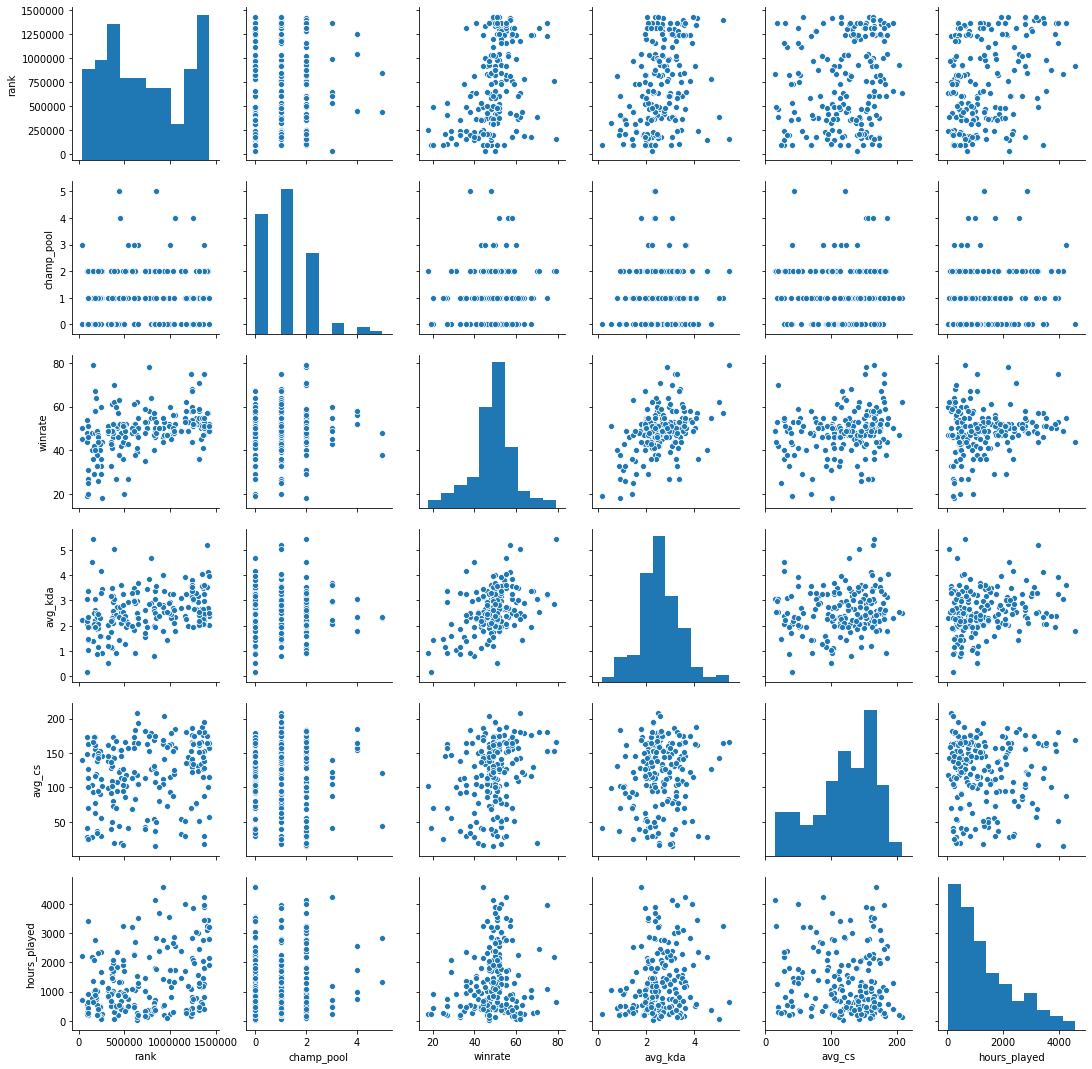

In [372]:
sns.pairplot(test_model_purerank)

In [373]:
test_model_purerank.corr()

,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
rank,1.000000,0.084472,0.376552,0.301553,0.191184,0.338743
champ_pool,0.084472,1.000000,0.118430,0.021161,-0.093150,0.075063
winrate,0.376552,0.118430,1.000000,0.439139,0.255770,0.158611
avg_kda,0.301553,0.021161,0.439139,1.000000,0.113338,0.188192
avg_cs,0.191184,-0.093150,0.255770,0.113338,1.000000,-0.066837
hours_played,0.338743,0.075063,0.158611,0.188192,-0.066837,1.000000


In [385]:
test_lm = smf.ols('rank ~ champ_pool + winrate + avg_kda + avg_cs + hours_played', data=test_model_purerank)

test_fit = test_lm.fit()

test_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     12.92
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           8.36e-11
Time:                        12:34:43   Log-Likelihood:                -2750.8
No. Observations:                 193   AIC:                             5514.
Df Residuals:                     187   BIC:                             5533.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.901e+05   1.48e+05     -1.958      0.052   -5.82e+05    2195.777
champ_pool    8810.3017   2.78e+04      0.317      0.752    -4.6e+04    6.37e+04
winrate       1.114e+04   3233.820      3.445      0.001    4762.017    1.75e+04
avg_kda        6.67e+04   3.72e+04      1.795      0.074   -6589.183     1.4e+05
avg_cs        1177.2174    608.559      1.934      0.055     -23.305    2377.740
hours_played   114.2324     26.561      4.301      0.000      61.835     166.629
==============================================================================
Omnibus:                        5.645   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                3.131
Skew:                          -0.028   Prob(JB):                        0.209
Kurtosis:                       2.378   Cond. No.                     9.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [459]:
# riot api requests
url3 = 'https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/RyanLanisafatman?api_key=RGAPI-1f31b9f9-494b-4807-b5a4-338f3e7ca799'
response3 = requests.get(url3)
page3 = response3.text
soup3 = BeautifulSoup(page3)
testDict = json.loads(str(soup3.text))
print(testDict)
print(response3.status_code)

{'status': {'message': 'Data not found - summoner not found', 'status_code': 404}}
404


In [442]:
url3 = 'https://na1.api.riotgames.com/lol/match/v4/matchlists/by-account/ZXm0oJTTdpsyz1WixMxOTJUuajij7i9O68TOwjPJ5TwFtg?api_key=RGAPI-1f31b9f9-494b-4807-b5a4-338f3e7ca799'
response3 = requests.get(url3)
page3 = response3.text
soup3 = BeautifulSoup(page3)
testDict = json.loads(str(soup3.text))
print(testDict)

{'matches': [{'platformId': 'NA1', 'gameId': 3068805678, 'champion': 44, 'queue': 420, 'season': 13, 'timestamp': 1560792355908, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'NA1', 'gameId': 3068802253, 'champion': 44, 'queue': 420, 'season': 13, 'timestamp': 1560790408594, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'NA1', 'gameId': 2981155692, 'champion': 12, 'queue': 420, 'season': 13, 'timestamp': 1550541675522, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'NA1', 'gameId': 2981109579, 'champion': 25, 'queue': 420, 'season': 13, 'timestamp': 1550539862860, 'role': 'DUO_SUPPORT', 'lane': 'BOTTOM'}, {'platformId': 'NA1', 'gameId': 2981106025, 'champion': 25, 'queue': 420, 'season': 13, 'timestamp': 1550539089447, 'role': 'DUO', 'lane': 'NONE'}, {'platformId': 'NA1', 'gameId': 2977779086, 'champion': 117, 'queue': 420, 'season': 13, 'timestamp': 1550193162198, 'role': 'SOLO', 'lane': 'BOTTOM'}, {'platformId': 'NA1', 'gameId': 2977763345, 'champion':

In [6]:
import json
url3 = 'https://na1.api.riotgames.com/lol/match/v4/matches/3068805678?api_key=RGAPI-1f31b9f9-494b-4807-b5a4-338f3e7ca799'
response3 = requests.get(url3)
page3 = response3.text
soup3 = BeautifulSoup(page3)
testDict = json.loads(str(soup3.text))
print(testDict)

{'gameId': 3068805678, 'platformId': 'NA1', 'gameCreation': 1560792355908, 'gameDuration': 1868, 'queueId': 420, 'mapId': 11, 'seasonId': 13, 'gameVersion': '9.12.277.6038', 'gameMode': 'CLASSIC', 'gameType': 'MATCHED_GAME', 'teams': [{'teamId': 100, 'win': 'Win', 'firstBlood': False, 'firstTower': False, 'firstInhibitor': True, 'firstBaron': True, 'firstDragon': False, 'firstRiftHerald': False, 'towerKills': 6, 'inhibitorKills': 1, 'baronKills': 1, 'dragonKills': 1, 'vilemawKills': 0, 'riftHeraldKills': 0, 'dominionVictoryScore': 0, 'bans': [{'championId': 350, 'pickTurn': 1}, {'championId': 19, 'pickTurn': 2}, {'championId': 82, 'pickTurn': 3}, {'championId': 517, 'pickTurn': 4}, {'championId': 25, 'pickTurn': 5}]}, {'teamId': 200, 'win': 'Fail', 'firstBlood': True, 'firstTower': True, 'firstInhibitor': False, 'firstBaron': False, 'firstDragon': True, 'firstRiftHerald': True, 'towerKills': 4, 'inhibitorKills': 0, 'baronKills': 0, 'dragonKills': 3, 'vilemawKills': 0, 'riftHeraldKills'

In [5]:
import pprint
pprint.pprint(testDict)

NameError: name 'testDict' is not defined

In [43]:
# get stats from riot api 
def get_summ_id(username):
    url3 = 'https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/'+username+'?api_key=RGAPI-1f31b9f9-494b-4807-b5a4-338f3e7ca799'
    response3 = requests.get(url3)
    page3 = response3.text
    soup3 = BeautifulSoup(page3)
    apiDict = json.loads(str(soup3.text))
    return response3, apiDict

def get_matchlist(apiDict):
    url3 = 'https://na1.api.riotgames.com/lol/match/v4/matchlists/by-account/'+apiDict['accountId']+'?api_key=RGAPI-1f31b9f9-494b-4807-b5a4-338f3e7ca799'
    response3 = requests.get(url3)
    page3 = response3.text
    soup3 = BeautifulSoup(page3)
    apiDict = json.loads(str(soup3.text))
    return response3, apiDict

gameIdList = []


response3, apiDict = get_summ_id('MisterKillU')
response3, apiDict = get_matchlist(apiDict)


for match in range(0, 16):
    gameIdList.append(apiDict['matches'][match]['gameId'])

def get_match_data(gameId):
    url3 = 'https://na1.api.riotgames.com/lol/match/v4/matches/'+str(gameId)+'?api_key=RGAPI-1f31b9f9-494b-4807-b5a4-338f3e7ca799'
    response3 = requests.get(url3)
    page3 = response3.text
    soup3 = BeautifulSoup(page3)
    apiDict = json.loads(str(soup3.text))
    return response3, apiDict




dmg_obj, gold_spent, cc_score, total_dmg_champs, total_dmg_taken, vision_score, dps = 0,0,0,0,0,0,0
for gameId in gameIdList:
    response3, apiDict = get_match_data(gameId)
    pprint.pprint(apiDict)
    for participant in apiDict['participantIdentities']:
        if participant['player']['summonerName'] == 'MisterKillU':
            partId = participant['participantId']
    for participant in apiDict['participants']:
        if participant['participantId'] == partId:
            dmg_obj += participant['stats']['damageDealtToObjectives']
            gold_spent += participant['stats']['goldSpent']
            cc_score += participant['stats']['timeCCingOthers']
            total_dmg_champs += participant['stats']['totalDamageDealtToChampions']
            total_dmg_taken += participant['stats']['totalDamageTaken']
            vision_score += participant['stats']['visionScore']
            dps += total_dmg_champs/apiDict['gameDuration']
avg_dmg_obj = dmg_obj/15
avg_gold_spent = gold_spent/15
avg_cc_score = cc_score/15
avg_dmg_champs = total_dmg_champs/15
avg_dmg_taken = total_dmg_taken/15
avg_vision_score = vision_score/15
avg_dps = dps/15

print('avg_dmg_obj: ' + str(avg_dmg_obj))
print('avg_gold_spent: ' + str(avg_gold_spent))
print('avg_cc_score: ' + str(avg_cc_score))
print('avg_dmg_champs: ' + str(avg_dmg_champs))
print('avg_dmg_taken: ' + str(avg_dmg_taken))
print('avg_vision_score: ' + str(avg_vision_score))
print('avg_dps: ' + str(avg_dps))

{'status': {'message': 'Data not found', 'status_code': 404}}


KeyError: 'participantIdentities'

In [ ]:
# disturbedmf avg stats
# avg_dmg_obj: 5838.933333333333
# avg_gold_spen: 10183.866666666667
# avg_cc_score: 45.2
# avg_dmg_champs: 20958.266666666666
# avg_dmg_taken: 19112.666666666668
# avg_vision_score: 36.0

In [48]:
# SAVE THE DATA this version took so long to get
data_to_model.to_pickle('./final_small_dataset.pkl')

In [49]:
data_to_model.corr()

,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played,avg_dmg_obj,avg_gold_spent,avg_cc_score,avg_dmg_champs,avg_dmg_taken,avg_vision_score,avg_dps
rank,1.000000,0.050257,0.268238,0.230988,0.207968,0.322561,0.054260,0.211396,0.017322,0.171587,-0.077374,0.292099,0.178555
champ_pool,0.050257,1.000000,-0.076966,-0.147893,-0.212206,0.098058,-0.005627,0.080149,-0.034017,0.051503,0.027060,0.138865,0.113036
winrate,0.268238,-0.076966,1.000000,0.433802,0.166216,0.067255,0.095935,0.157140,0.005677,0.102111,0.018862,0.140844,-0.055437
avg_kda,0.230988,-0.147893,0.433802,1.000000,0.149030,0.018040,0.052642,0.061891,-0.076426,0.032606,-0.206293,0.154973,-0.030529
avg_cs,0.207968,-0.212206,0.166216,0.149030,1.000000,-0.025348,0.303098,0.374305,-0.431526,0.310876,0.199529,-0.271132,0.184764
hours_played,0.322561,0.098058,0.067255,0.018040,-0.025348,1.000000,-0.117526,0.189320,0.136517,0.209773,0.028043,-0.008743,0.265700
avg_dmg_obj,0.054260,-0.005627,0.095935,0.052642,0.303098,-0.117526,1.000000,0.382880,-0.300207,0.159506,0.309702,0.145519,0.001180
avg_gold_spent,0.211396,0.080149,0.157140,0.061891,0.374305,0.189320,0.382880,1.000000,-0.124896,0.797816,0.506840,-0.127962,0.453334
avg_cc_score,0.017322,-0.034017,0.005677,-0.076426,-0.431526,0.136517,-0.300207,-0.124896,1.000000,-0.022651,0.010612,0.364791,-0.105663
avg_dmg_champs,0.171587,0.051503,0.102111,0.032606,0.310876,0.209773,0.159506,0.797816,-0.022651,1.000000,0.373024,-0.146365,0.661142


/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


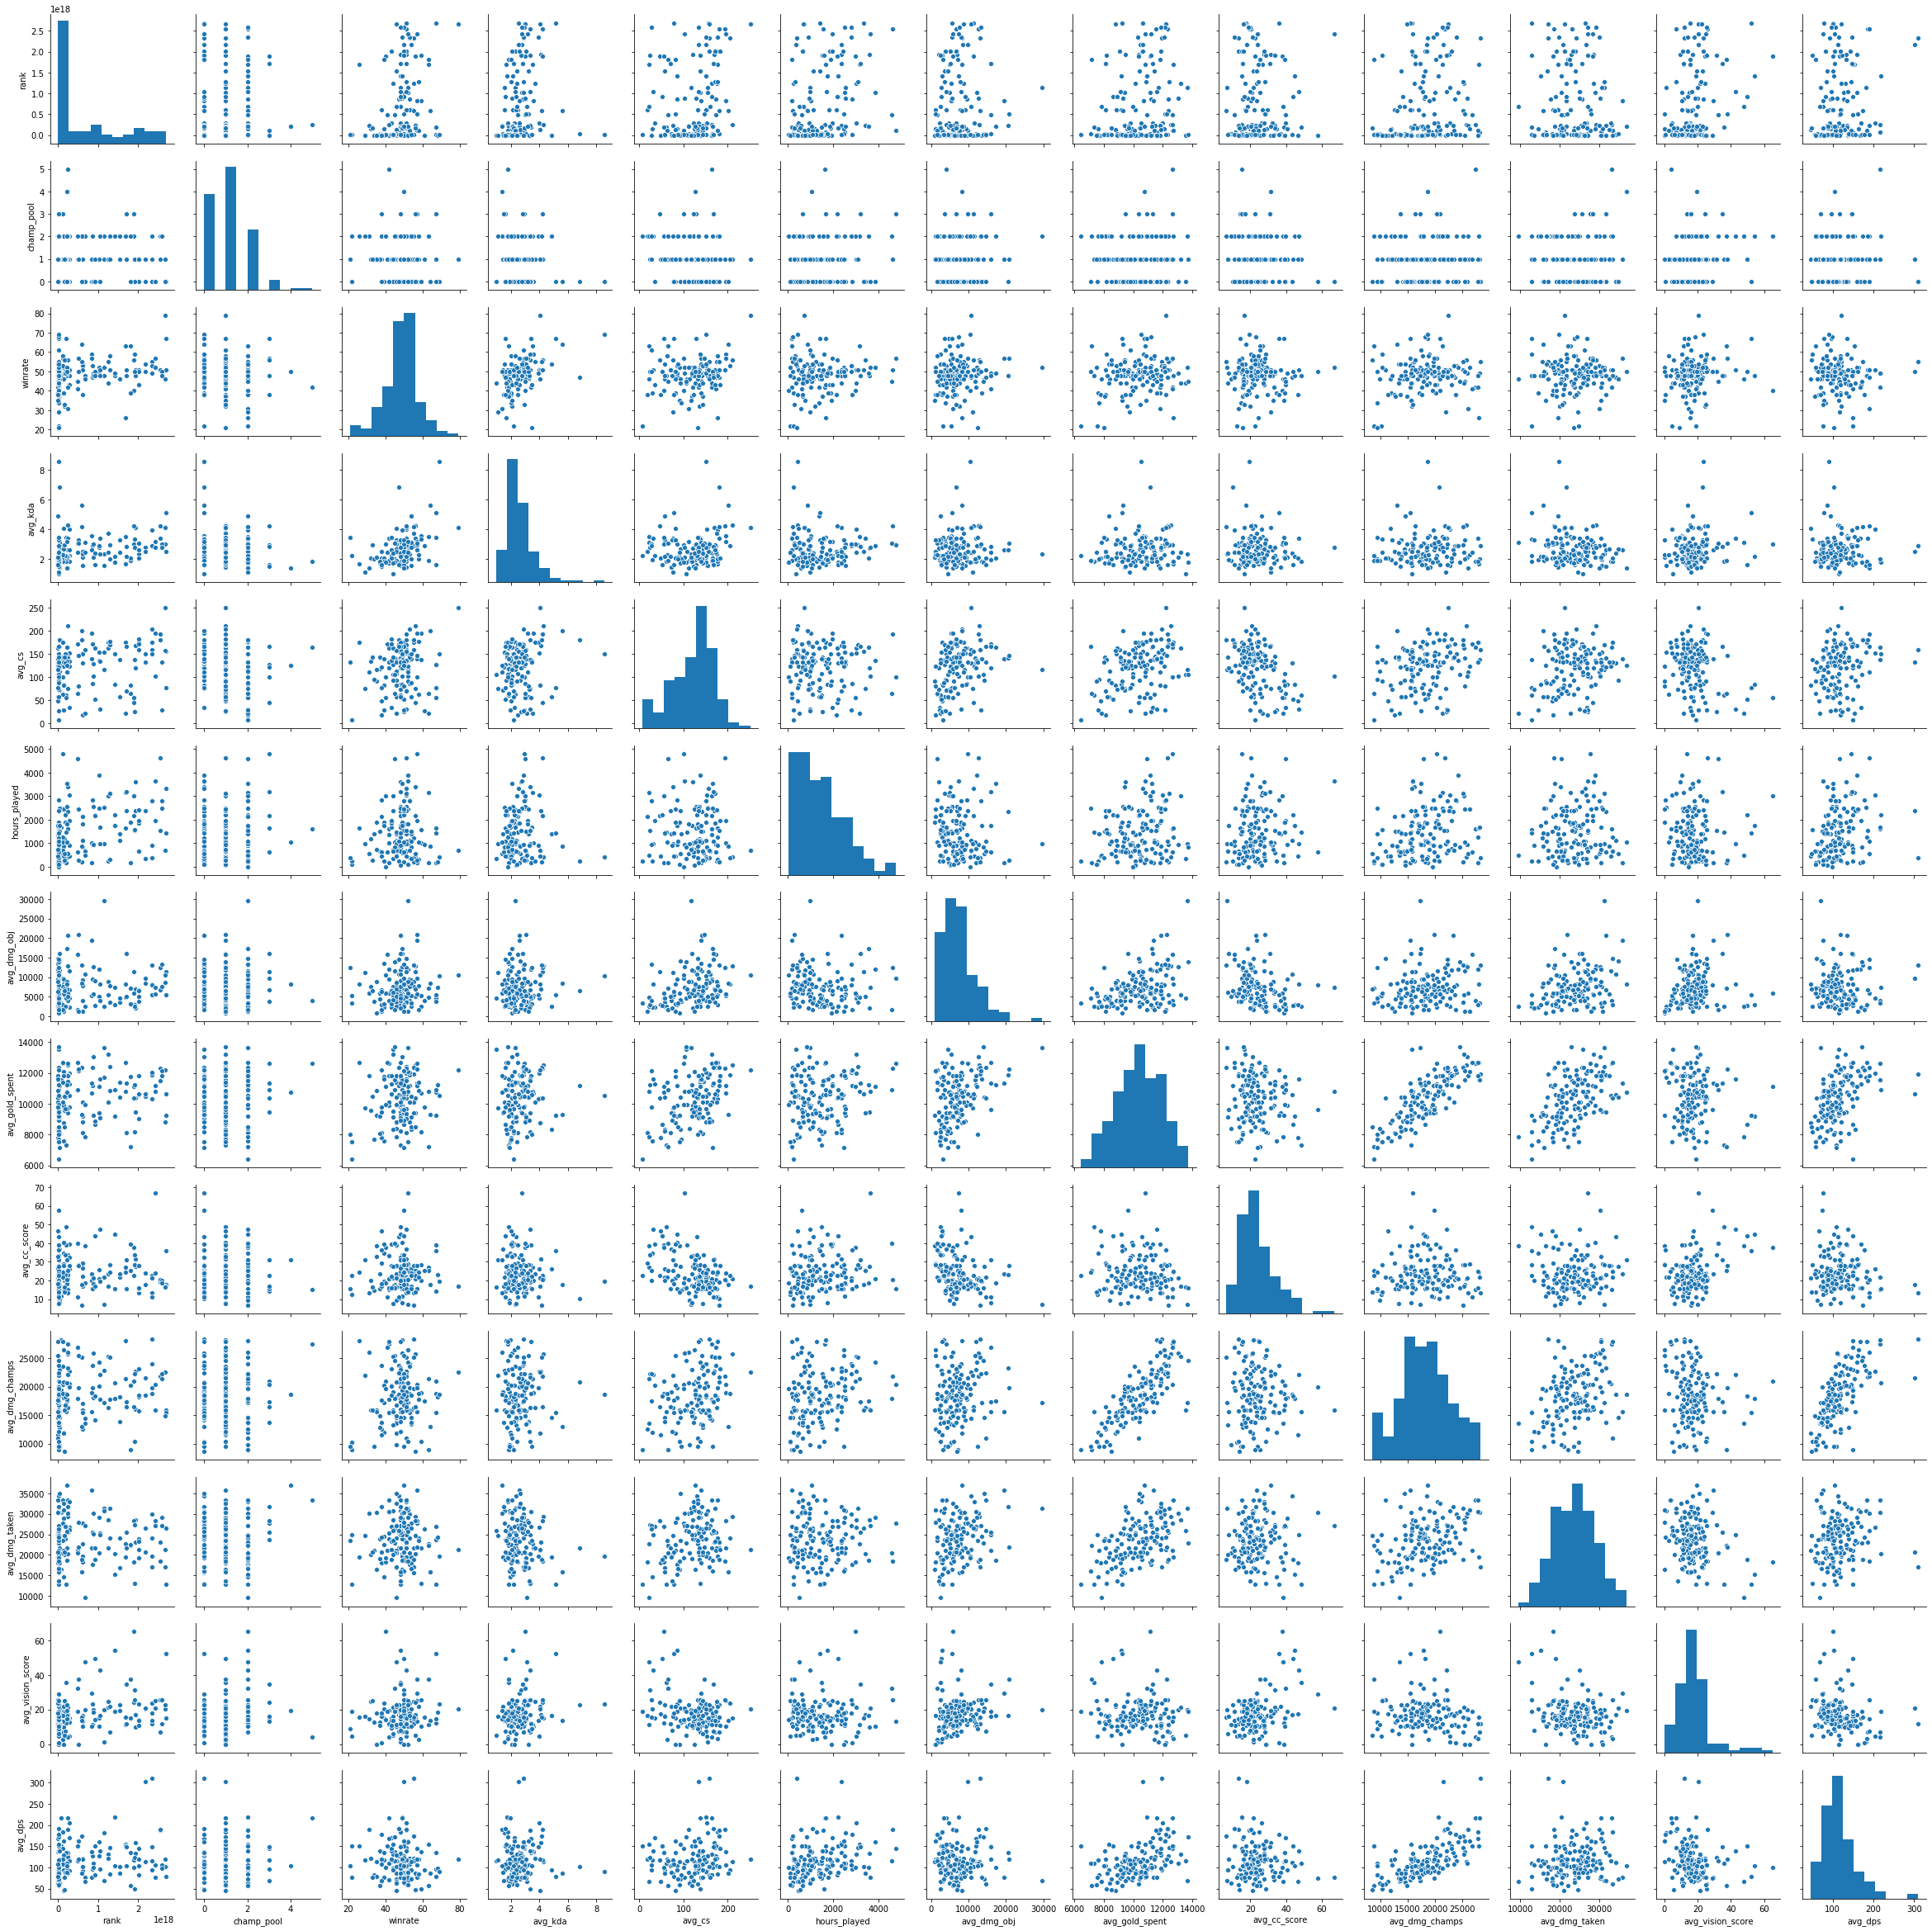

In [50]:
sns.pairplot(data_to_model)

In [51]:
columns

['summoner_name',
 'rank',
 'champ_pool',
 'winrate',
 'avg_kda',
 'avg_cs',
 'hours_played',
 'avg_dmg_obj',
 'avg_gold_spent',
 'avg_cc_score',
 'avg_dmg_champs',
 'avg_dmg_taken',
 'avg_vision_score',
 'avg_dps']

In [54]:
final_small_lm = smf.ols('rank ~ champ_pool + winrate + avg_kda + avg_cs + hours_played + avg_dmg_obj +'
                         +'avg_gold_spent + avg_cc_score + avg_dmg_taken + avg_vision_score + '
                         +'avg_dps', data=data_to_model)

final_small_fit = final_small_lm.fit()

final_small_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     6.145
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           4.60e-08
Time:                        03:11:27   Log-Likelihood:                -6037.3
No. Observations:                 142   AIC:                         1.210e+04
Df Residuals:                     130   BIC:                         1.213e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.166e+18   5.93e+17     -3.653      0.000   -3.34e+18   -9.93e+17
champ_pool       -5.643e+15   7.33e+16     -0.077      0.939   -1.51e+17    1.39e+17
winrate           1.644e+16   8.41e+15      1.956      0.053   -1.89e+14    3.31e+16
avg_kda           3.885e+16   7.25e+16      0.536      0.593   -1.05e+17    1.82e+17
avg_cs            4.579e+15   1.65e+15      2.781      0.006    1.32e+15    7.84e+15
hours_played      2.164e+14   6.31e+13      3.427      0.001    9.15e+13    3.41e+14
avg_dmg_obj      -1.967e+13   1.76e+13     -1.116      0.266   -5.45e+13    1.52e+13
avg_gold_spent    7.096e+13   5.98e+13      1.187      0.237   -4.73e+13    1.89e+14
avg_cc_score     -2.588e+15   8.47e+15     -0.306      0.760   -1.93e+16    1.42e+16
avg_dmg_taken    -1.111e+13   1.56e+13     -0.713      0.477    -4.2e+13    1.97e+13
avg_vision_score  3.291e+16   8.07e+15      4.076      0.000    1.69e+16    4.89e+16
avg_dps           2.463e+15   1.76e+15      1.398      0.164   -1.02e+15    5.95e+15
==============================================================================
Omnibus:                        9.928   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.744
Skew:                           0.670   Prob(JB):                      0.00464
Kurtosis:                       2.862   Cond. No.                     2.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

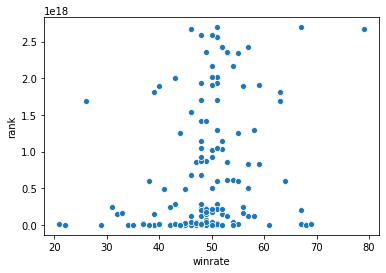

In [56]:
sns.scatterplot(x='winrate', y='rank', data=data_to_model)
plt.savefig('wr_vs_rank.png')

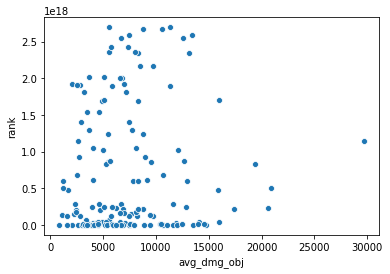

In [57]:
sns.scatterplot(x='avg_dmg_obj', y='rank', data=data_to_model)
plt.savefig('dmg_obj_vs_rank.png')

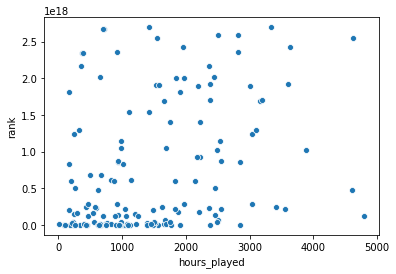

In [58]:
sns.scatterplot(x='hours_played', y='rank', data=data_to_model)
plt.savefig('hours_vs_rank.png')

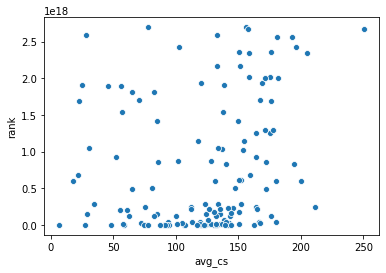

In [60]:
sns.scatterplot(x='avg_cs', y='rank', data=data_to_model)
plt.savefig('cs_vs_rank.png')

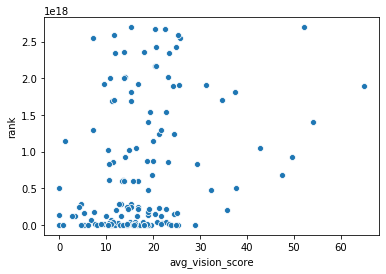

In [61]:
sns.scatterplot(x='avg_vision_score', y='rank', data=data_to_model)
plt.savefig('vision_vs_rank.png')

In [85]:
data_to_model = pd.read_pickle('./final_small_dataset.pkl')

In [86]:
data_to_model = data_to_model.dropna()

In [87]:
data_to_model = data_to_model.drop('summoner_name', axis=1)
cars = data_to_model.select_dtypes(exclude=['object']).copy()

In [88]:
regtestX, regtesty = cars.drop('rank', axis=1), cars['rank']
X, X_test, y, y_test = train_test_split(regtestX, regtesty, test_size=.2, random_state=408)

In [104]:
X, X_test, y, y_test = train_test_split(regtestX, regtesty, test_size=.2, random_state=10)

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [106]:
lm = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

In [107]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

Linear Regression val R^2: 0.168
Ridge Regression val R^2: 0.166


In [ ]:
# coefficients seem to be too large or too small for lass/ridge regularization to work properly
# and repeated k-fold tests seem inconsistent
# so normal ols adjusted r^2 is being used